In [1]:
import numpy as np
import pandas as pd
import pickle
import warnings


In [2]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
data_df = pd.read_csv("DataSet.csv", date_format=False)
data_df.head()

,Date,ATM 1,ATM 2,ATM 3,ATM (mean)
0,2017-03-21 00:00:00,36700000.0,1300000.0,108100000.0,48700000.00
1,2017-03-22 00:00:00,34100000.0,2000000.0,125100000.0,53733333.33
2,2017-03-23 00:00:00,17900000.0,300000.0,42400000.0,20200000.00
3,2017-03-24 00:00:00,33000000.0,7200000.0,94900000.0,45033333.33
4,2017-03-25 00:00:00,34800000.0,9600000.0,91800000.0,45400000.00


**Objetivo:**

¨¨¨
El propósito de este estudio es proponer una evaluación exhaustiva que prediga con precisión la demanda de efectivo en cajeros automáticos tanto antes como durante la pandemia de COVID-19 para diferentes categorías de cajeros automáticos.

¨¨¨

**Categorias de cajeros**

Estan en función de su accesibilidad y factores ambientales que afectana a la demanda diaria de efectivo como al patrón de retirada.

i) distritos residenciales: cajeros automáticos en los que el entorno no está dominado ni por empresas de oficinas ni por centros comerciales.

ii) distritos comerciales: alto retiro de efectivo entre semana y un bajo retiro de efectivo los fines de semana.

iii) distritos comerciales y recreativos: retiros de efectivo principalmente los fines de semana y en meses particulares.

In [6]:
# cajero automático 1: en el distrito residencial
# cajero automático 2 en el distrito comercial
# el cajero automático 3 en el distrito comercial y recreativo

**Tiempo**

tres años consecutivos desde el 21/03/2017 hasta el 19/03/2020

(calendario solar)


Cabe destacar que en Irán, los días de semana son de sábado a miércoles, y los fines de semana son jueves y viernes. 

**Conjunto de prueba:**

El período de tiempo dado de 3 años se divide por el período en que se observó la pandemia de COVID-19 en la sociedad. Del 20/02/2020 al 19/03/2020 (es decir, el último mes de los datos disponibles) es el período en el que comenzaron la pandemia y las medidas preventivas (por ejemplo, órdenes de quedarse en casa); por lo tanto, este período se selecciona como el conjunto de pruebas durante COVID-19 (todo el mes 12 en el calendario solar), en el que la demanda de efectivo disminuyó notablemente, seguida de volatilidades significativas en el patrón de retiro justo después de implementar la prevención. Para ser coherente con la duración de los conjuntos de pruebas, se seleccionó el conjunto de pruebas antes de COVID-19 entre el 21/01/2020 y el 19/02/2020 (todo el mes 11 en el calendario solar). El conjunto de entrenamiento comprende el resto de los datos, que comienza el 21/03/2017 y finaliza el 20/01/2020 (1036 días en total). El objetivo es elegir el modelo predictivo más prometedor en dos situaciones diferentes en momentos en los que hay una pequeña alteración en el patrón (aquí llamada como antes de la COVID-19) o una alteración significativa en la demanda y cambios radicales en el patrón de retirada (aquí denominada como durante la COVID-19). Es importante tener en cuenta que primero analizamos los cajeros automáticos 1, 2 y 3 por separado debido a sus patrones de uso establecidos inherentemente diferentes; A continuación, se tomó la media de estos tres mecanizados, se analizó la media de la ATM de forma totalmente independiente y se compararon los resultados. La figura 3 representa la división de los datos para ATM 1. El mismo enfoque de división se utilizó para los otros cajeros automáticos (ver Figs. S2-S4)

In [6]:
data_df = pd.read_csv("DataSet.csv", date_format=False)
data_df.head()

,Date,ATM 1,ATM 2,ATM 3,ATM (mean)
0,2017-03-21 00:00:00,36700000.0,1300000.0,108100000.0,48700000.00
1,2017-03-22 00:00:00,34100000.0,2000000.0,125100000.0,53733333.33
2,2017-03-23 00:00:00,17900000.0,300000.0,42400000.0,20200000.00
3,2017-03-24 00:00:00,33000000.0,7200000.0,94900000.0,45033333.33
4,2017-03-25 00:00:00,34800000.0,9600000.0,91800000.0,45400000.00


In [7]:
data_df = pd.read_csv("DataSet.csv", date_format=False)
data_df["Date"] = pd.to_datetime(data_df["Date"], yearfirst=True)
data_df.set_index("Date", inplace=True)
data_df.sort_values("Date", ascending=True, inplace=True)
data_df.head()

,ATM 1,ATM 2,ATM 3,ATM (mean)
Date,,,,
2017-03-21,36700000.0,1300000.0,108100000.0,48700000.00
2017-03-22,34100000.0,2000000.0,125100000.0,53733333.33
2017-03-23,17900000.0,300000.0,42400000.0,20200000.00
2017-03-24,33000000.0,7200000.0,94900000.0,45033333.33
2017-03-25,34800000.0,9600000.0,91800000.0,45400000.00


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-03-21 to 2020-03-19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATM 1       1095 non-null   float64
 1   ATM 2       1095 non-null   float64
 2   ATM 3       1095 non-null   float64
 3   ATM (mean)  1095 non-null   float64
dtypes: float64(4)
memory usage: 42.8 KB


In [9]:
import matplotlib.pyplot as plt 
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px

In [10]:
fig = px.line(data_df,y="ATM 1", title="Cash withdrawal for ATM 1")
fig.show()

In [11]:
fig = px.line(data_df,y="ATM 1", title="Cash withdrawal for ATM 1")
fig.update_xaxes(
    dtick="M1",  
    tickformat="%b %Y", 
    tickmode="linear"  
)
fig.show()

In [12]:
fig = px.line(data_df, y="ATM 2", title="Cash withdrawal for ATM 2")
fig.update_traces(line_color="orange")
fig.update_xaxes(
    dtick="M1",  
    tickformat="%b %Y", 
    tickmode="linear"  
)
fig.show()

In [13]:
fig = px.line(data_df,y="ATM 3", title="Cash withdrawal for ATM 3")
fig.update_traces(line_color="brown")
fig.update_xaxes(
    dtick="M1",  
    tickformat="%b %Y", 
    tickmode="linear"  
)
fig.show()

In [14]:
fig = px.line(data_df,y="ATM (mean)", title="Cash withdrawal for ATM (mean)")
fig.update_traces(line_color="teal")
fig.update_xaxes(
    dtick="M1",  
    tickformat="%b %Y", 
    tickmode="linear"  
)
fig.show()

En el último mes de los 2 primeros años, la demanda de efectivo tiene una tendencia al alza para todos los cajeros automáticos. Sin embargo, el último mes del tercer año tiene una tendencia contraria debido al inicio de la pandemia de COVID-19 y el anuncio de una orden de quedarse en casa.

los cajeros automáticos 1 y 2 tienen una alta demanda de efectivo durante los días laborables, seguida de una baja cantidad de dinero retirada los fines de semana. Sin embargo, la demanda de efectivo de los cajeros automáticos 2 (ubicados en los distritos comerciales) es menor porque menos personas, en su mayoría personal de las empresas/agencias cercanas, tienen acceso a dichos cajeros automáticos. El cajero automático 3 tiene una tendencia opuesta, con una gran cantidad de efectivo con retiro los fines de semana en lugar de los días laborables

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-03-21 to 2020-03-19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATM 1       1095 non-null   float64
 1   ATM 2       1095 non-null   float64
 2   ATM 3       1095 non-null   float64
 3   ATM (mean)  1095 non-null   float64
dtypes: float64(4)
memory usage: 42.8 KB


#### Características de fecha

In [16]:
data_df.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date', length=1095)

In [17]:
data_df["weekday_name"] = data_df.index.day_name()
data_df["week_day"] = data_df.index.weekday
data_df["day"] = data_df.index.day
data_df["iso_week"] = data_df.index.isocalendar().week 
data_df["hour"] = data_df.index.hour
data_df["month"] = data_df.index.month
data_df["month_name"] = data_df.index.month_name()
data_df["year"] = data_df.index.year

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-03-21 to 2020-03-19
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ATM 1         1095 non-null   float64
 1   ATM 2         1095 non-null   float64
 2   ATM 3         1095 non-null   float64
 3   ATM (mean)    1095 non-null   float64
 4   weekday_name  1095 non-null   object 
 5   week_day      1095 non-null   int32  
 6   day           1095 non-null   int32  
 7   iso_week      1095 non-null   UInt32 
 8   hour          1095 non-null   int32  
 9   month         1095 non-null   int32  
 10  month_name    1095 non-null   object 
 11  year          1095 non-null   int32  
dtypes: UInt32(1), float64(4), int32(5), object(2)
memory usage: 86.6+ KB


Cuando tienes una serie temporal larga con mucha variación, como la que tenemos nosotros, el gráfico de líneas puede resultar un poco caótico. Una de las opciones para obtener una visión macrográfica de las series temporales en términos de tendencias y movimiento es trazar una versión suavizada de las series temporales. Veamos cómo se ve un promedio mensual móvil de las series temporales:

In [19]:
ts_df = data_df

In [20]:
ts_df["rolling_m_avg_atm_1"] = ts_df["ATM 1"].rolling(window=30).mean()

In [21]:
fig = px.line(
    ts_df, 
    y="rolling_m_avg_atm_1", 
    title="Rolling Monthly Average Cash withdrawal for ATM 1"
)

fig.show()

In [22]:
ts_df["rolling_m_avg_atm_2"] = ts_df["ATM 2"].rolling(window=30).mean()
fig = px.line(
    ts_df, 
    y="rolling_m_avg_atm_2", 
    title="Rolling Monthly Average Cash withdrawal for ATM 2"
)
fig.show()

In [23]:
ts_df["rolling_m_avg_atm_3"] = ts_df["ATM 3"].rolling(window=30).mean()
fig = px.line(
    ts_df, 
    y="rolling_m_avg_atm_3", 
    title="Rolling Monthly Average Cash withdrawal for ATM 3"
)
fig.show()

### Seasonal Plots
Annual Seasonality at Monthly Resolution

Un gráfico estacional es muy similar a un gráfico de líneas, pero la diferencia clave aquí es que el eje X denota las "estaciones", el eje Y denota el valor de la serie temporal y los diferentes ciclos estacionales se representan en diferentes colores o tipos de líneas. Por ejemplo, la estacionalidad anual a una resolución mensual se puede representar con meses en el eje X y diferentes años en diferentes colores. 

In [24]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-03-21 to 2020-03-19
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ATM 1                1095 non-null   float64
 1   ATM 2                1095 non-null   float64
 2   ATM 3                1095 non-null   float64
 3   ATM (mean)           1095 non-null   float64
 4   weekday_name         1095 non-null   object 
 5   week_day             1095 non-null   int32  
 6   day                  1095 non-null   int32  
 7   iso_week             1095 non-null   UInt32 
 8   hour                 1095 non-null   int32  
 9   month                1095 non-null   int32  
 10  month_name           1095 non-null   object 
 11  year                 1095 non-null   int32  
 12  rolling_m_avg_atm_1  1066 non-null   float64
 13  rolling_m_avg_atm_2  1066 non-null   float64
 14  rolling_m_avg_atm_3  1066 non-null   float64
dtypes: UInt32(1), float6

In [25]:
plot_df = ts_df[~ts_df.year.isin([2020,])].groupby(["year", "month"])[["ATM 1"]].mean().reset_index()
fig = px.line(plot_df, x="month", y="ATM 1", color="year", line_dash="year", title="Seasonal Plot - Monthly")
fig.show()

In [26]:
plot_df = ts_df[~ts_df.year.isin([2020,])].groupby(["year", "month"])[["ATM 2"]].mean().reset_index()
fig = px.line(plot_df, x="month", y="ATM 2", color="year", line_dash="year", title="Seasonal Plot - Monthly")
fig.show()

In [27]:
plot_df = ts_df[~ts_df.year.isin([2020,])].groupby(["year", "month"])[["ATM 3"]].mean().reset_index()
fig = px.line(plot_df, x="month", y="ATM 3", color="year", line_dash="year", title="Seasonal Plot - Monthly")
fig.show()

In [28]:
plot_df = ts_df[~ts_df.year.isin([2020,])].groupby(["year", "month"])[["ATM (mean)"]].mean().reset_index()
fig = px.line(plot_df, x="month", y="ATM (mean)", color="year", line_dash="year", title="Seasonal Plot - Monthly")
fig.show()

### Autocorrelation plot

Si la correlación indica la fuerza y la dirección de la relación lineal entre dos variables, la autocorrelación es la correlación entre los valores de una serie temporal en períodos sucesivos. La mayoría de las series temporales tienen una gran dependencia del valor del período anterior, y este es un componente crítico en muchos de los modelos de predicción que también veremos. Algo como ARIMA.

In [29]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-03-21 to 2020-03-19
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ATM 1                1095 non-null   float64
 1   ATM 2                1095 non-null   float64
 2   ATM 3                1095 non-null   float64
 3   ATM (mean)           1095 non-null   float64
 4   weekday_name         1095 non-null   object 
 5   week_day             1095 non-null   int32  
 6   day                  1095 non-null   int32  
 7   iso_week             1095 non-null   UInt32 
 8   hour                 1095 non-null   int32  
 9   month                1095 non-null   int32  
 10  month_name           1095 non-null   object 
 11  year                 1095 non-null   int32  
 12  rolling_m_avg_atm_1  1066 non-null   float64
 13  rolling_m_avg_atm_2  1066 non-null   float64
 14  rolling_m_avg_atm_3  1066 non-null   float64
dtypes: UInt32(1), float6

In [30]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

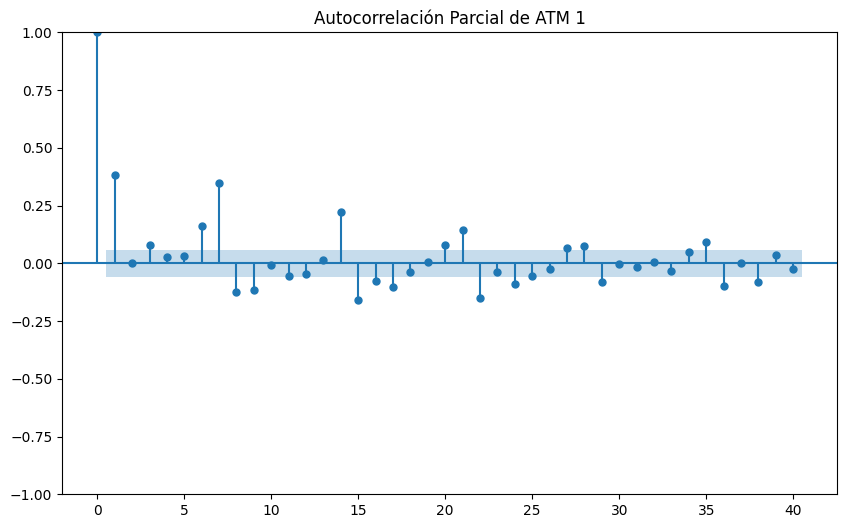

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(data_df['ATM 1'].dropna(), lags=40, ax=ax)  # Puedes cambiar '40' por el número de lags deseado
ax.set_title('Autocorrelación Parcial de ATM 1')
plt.show()

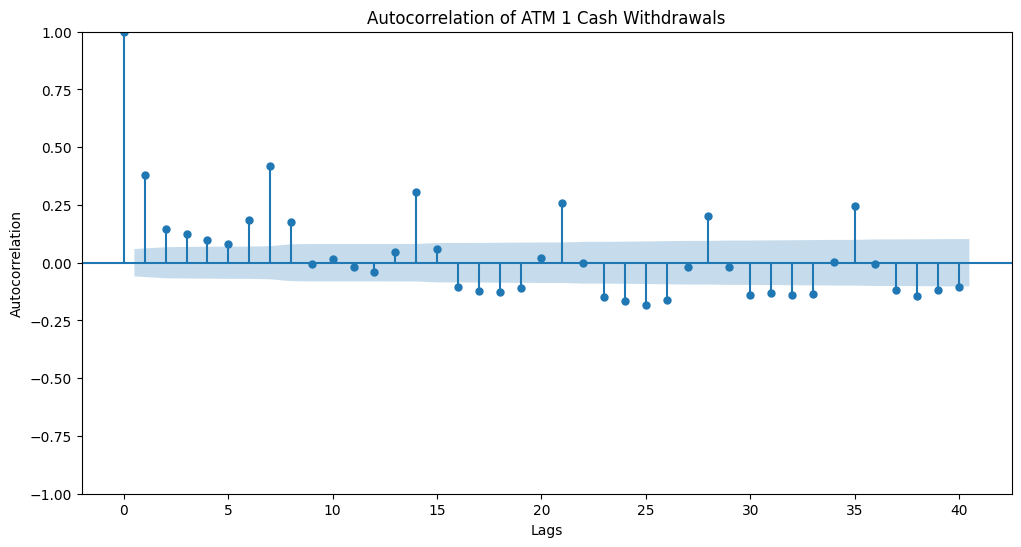

In [32]:
atm_1_series = data_df['ATM 1']


plt.figure(figsize=(12, 6))
plot_acf(atm_1_series, lags=40, ax=plt.gca())  
plt.title('Autocorrelation of ATM 1 Cash Withdrawals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

plt.show()

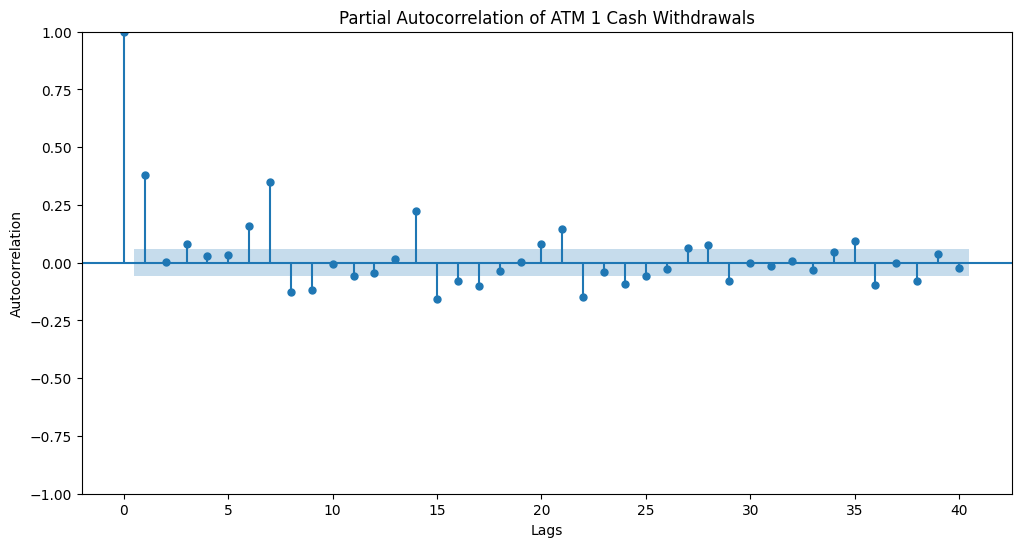

In [33]:
atm_1_series = data_df['ATM 1']


plt.figure(figsize=(12, 6))
plot_pacf(atm_1_series, lags=40, ax=plt.gca())  
plt.title('Partial Autocorrelation of ATM 1 Cash Withdrawals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

plt.show()

Text(0, 0.5, 'Autocorrelation')

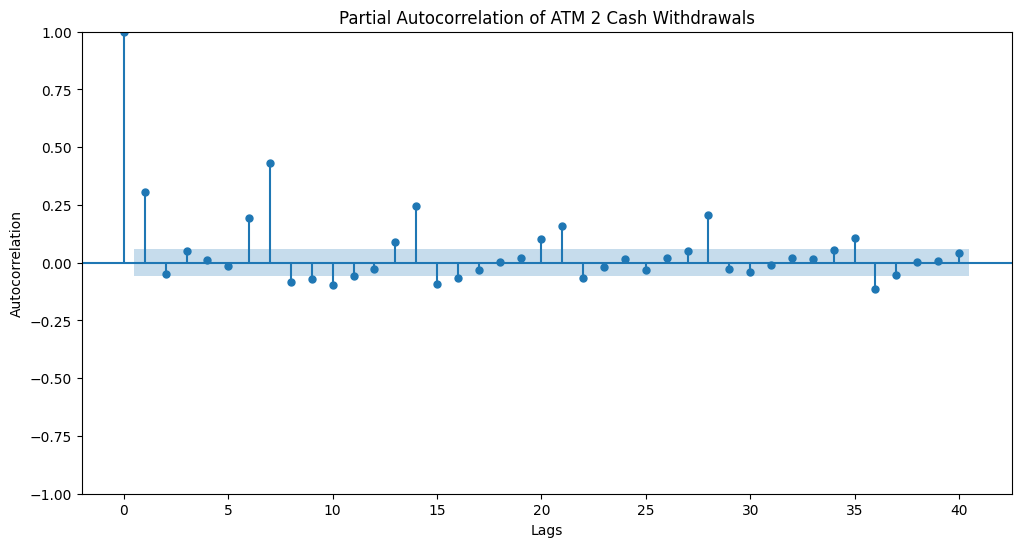

In [34]:
atm_2_series = data_df['ATM 2']


plt.figure(figsize=(12, 6))
plot_pacf(atm_2_series, lags=40, ax=plt.gca())  
plt.title('Partial Autocorrelation of ATM 2 Cash Withdrawals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

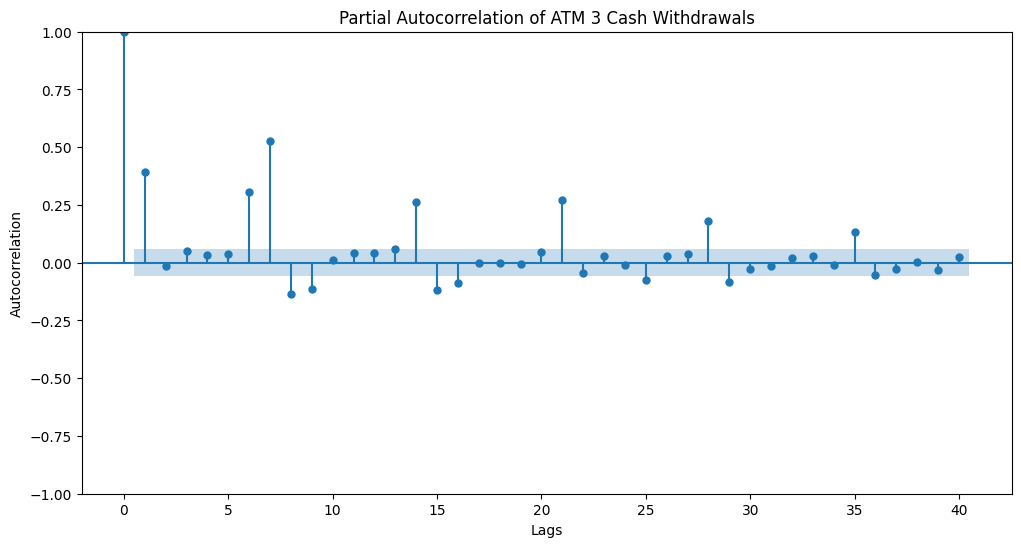

In [35]:
atm_3_series = data_df['ATM 3']


plt.figure(figsize=(12, 6))
plot_pacf(atm_3_series, lags=40, ax=plt.gca())  
plt.title('Partial Autocorrelation of ATM 3 Cash Withdrawals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

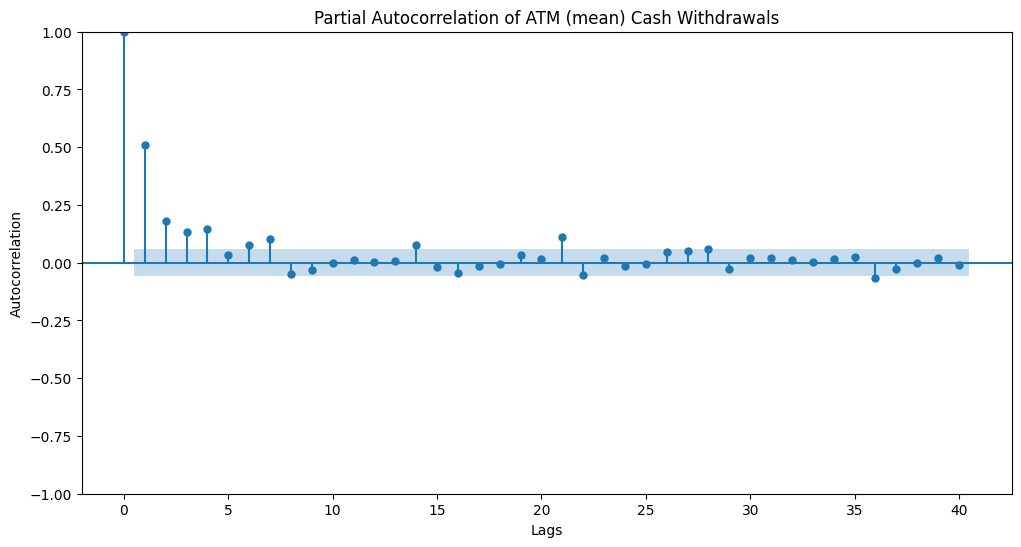

In [36]:
atm_mean_series = data_df['ATM (mean)']


plt.figure(figsize=(12, 6))
plot_pacf(atm_mean_series, lags=40, ax=plt.gca())  
plt.title('Partial Autocorrelation of ATM (mean) Cash Withdrawals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

In [37]:
del atm_mean_series, atm_1_series, atm_2_series, atm_3_series

Aquí es donde los gráficos de autocorrelación son útiles. En tales gráficas, tenemos los diferentes rezagos (t-1, t-2, t-3, etc.) en el eje X y las correlaciones entre t y los diferentes rezagos en el eje Y. Además de la autocorrelación, también podemos observar la autocorrelación parcial, que es muy similar a la autocorrelación pero con una diferencia clave: la autocorrelación parcial elimina cualquier correlación indirecta que pueda estar presente antes de presentar las correlaciones. Veamos un ejemplo para entender esto. Si t es el paso de tiempo actual, supongamos que t-1 está altamente correlacionado con t. Por lo tanto, al extender esta lógica, t-2 estará altamente correlacionado con t-1 y, debido a esta correlación, la autocorrelación entre t y t-2 sería alta. Sin embargo, la autocorrelación parcial corrige esto y extrae la correlación, que puede atribuirse puramente a t-2 y t.

### Decomposing a time series

La descomposición estacional es el proceso mediante el cual deconstruimos una serie temporal en sus componentes, por lo general, **tendencia**, **estacionalidad** y **residuos**. El enfoque general para descomponer una serie temporal es el siguiente: 1. 2. Detrending: Aquí, estimamos el componente de tendencia (que es el cambio suave en la serie temporal) y lo eliminamos de la serie temporal, lo que nos da una serie temporal sin tendencia. Desestacionalización: Aquí, estimamos el componente de estacionalidad a partir de las series temporales sin tendencia. Después de eliminar el componente estacional, lo que queda es el residual. Vamos a discutirlos en detalle.

##### Detreding

La eliminación de tendencias se puede realizar de diferentes maneras. Dos formas populares de hacerlo son el uso de medias móviles y la locally estimated scatterplot smoothing (LOESS) regression

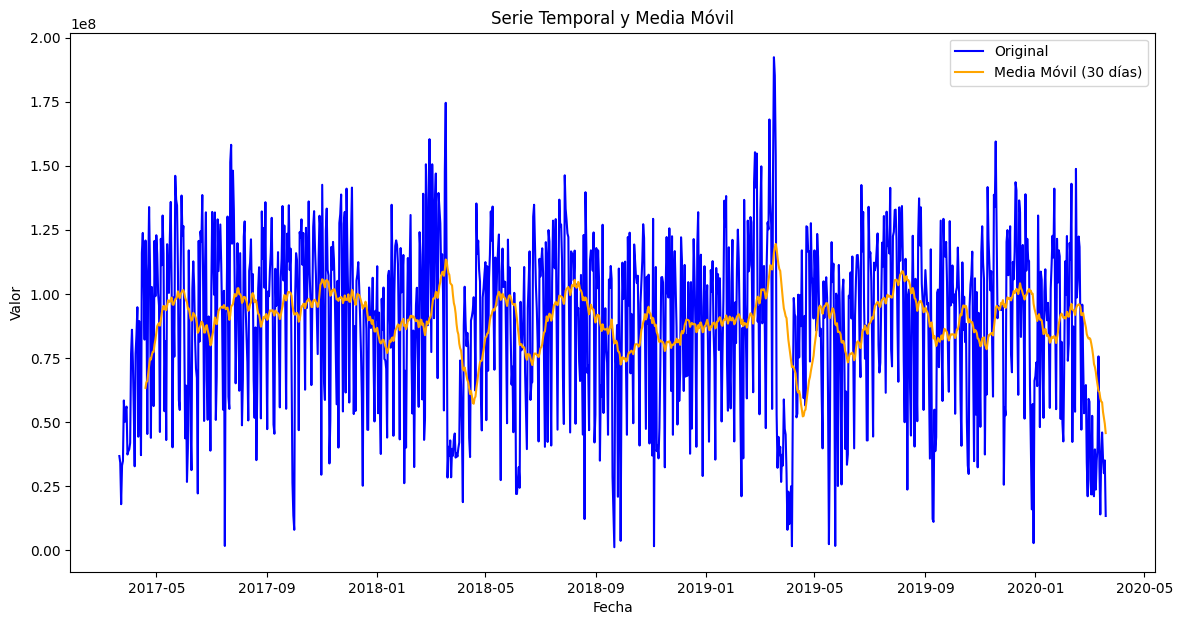

In [38]:
#Descomposición usando Media Móvil
window_size = 30
ts_df['Moving_Avg'] = ts_df['ATM 1'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 7))
plt.plot(ts_df.index, ts_df['ATM 1'], label='Original', color='blue')
plt.plot(ts_df.index, ts_df['Moving_Avg'], label=f'Media Móvil ({window_size} días)', color='orange')
plt.title('Serie Temporal y Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [39]:
print(data_df.index)
print(type(data_df.index))

DatetimeIndex(['2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
               '2017-03-25', '2017-03-26', '2017-03-27', '2017-03-28',
               '2017-03-29', '2017-03-30',
               ...
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


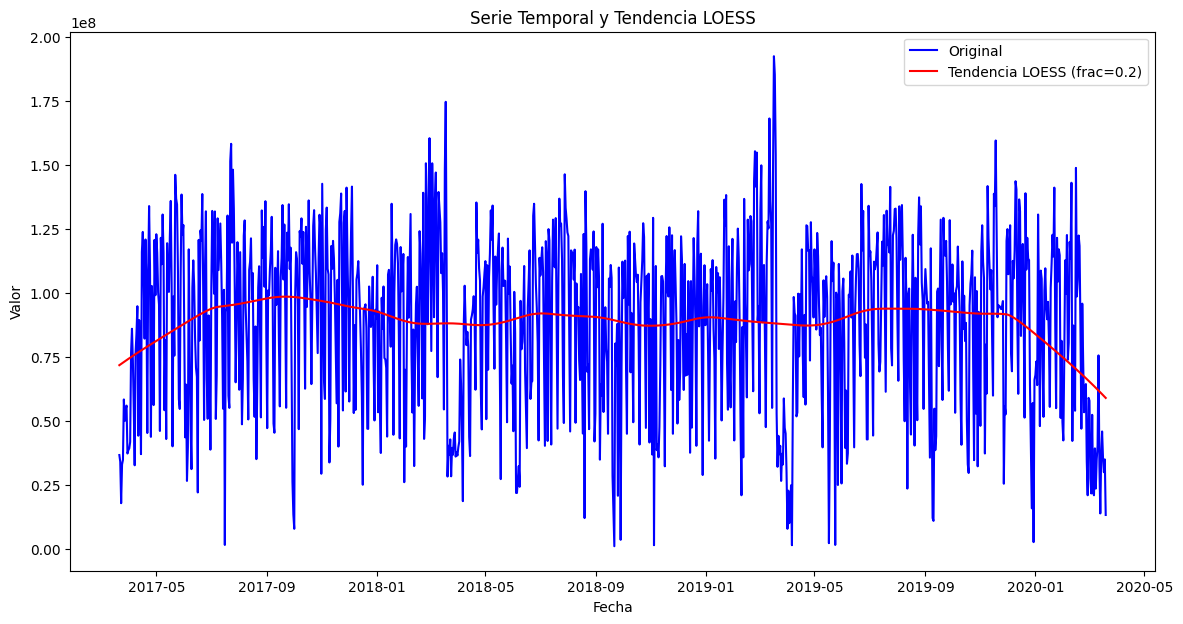

In [40]:
#Descomposición usando LOESS
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# convertir fechas a números
date_nums = mdates.date2num(data_df.index)

frac = 0.2  # fracción de puntos cercanos
lowess_result = lowess(data_df['ATM 1'], date_nums, frac=frac)

lowess_dates = mdates.num2date(lowess_result[:, 0])

plt.figure(figsize=(14, 7))
plt.plot(data_df.index, data_df['ATM 1'], label='Original', color='blue')
plt.plot(lowess_dates, lowess_result[:, 1], label=f'Tendencia LOESS (frac={frac})', color='red')
plt.title('Serie Temporal y Tendencia LOESS')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#### Deseasonalizing

El componente de estacionalidad también puede estimarse de diferentes maneras. Las dos formas más populares de hacer esto son mediante el uso de promedios ajustados por períodos o una serie de Fourier.

**Period adjusted averages**

Esta es una técnica bastante simple en la que calculamos un índice de estacionalidad para cada período en el ciclo esperado tomando los valores promedio de todos esos períodos en todos los ciclos. Para que quede claro, echemos un vistazo a una serie temporal mensual en la que esperamos una estacionalidad anual en esta serie temporal. Por lo tanto, el patrón ascendente y descendente completaría un ciclo completo en 12 meses, o el período de estacionalidad es de 12. En otras palabras, cada 12 puntos de la serie temporal tienen componentes estacionales similares. Por lo tanto, tomamos el promedio de todos los valores de enero como el promedio ajustado por período para enero. De la misma manera, calculamos el promedio del período para los 12 meses. Al final del ejercicio, tenemos 12 promedios de períodos, y también podemos calcular un promedio de períodos. Ahora, podemos convertir estos promedios de período en un índice restando el promedio de todos los promedios de período de cada uno de los promedios de período (para aditivo) o dividiendo el promedio de todos los promedios de período de cada uno de los promedios de período (multiplicativo). 

**Fourier series**

A finales del siglo XVIII, Joseph Fourier, un matemático y físico, mientras estudiaba el flujo de calor, se dio cuenta de algo profundo: cualquier función periódica se puede descomponer en una simple serie de ondas sinusoidales y coseno. Detengámonos en eso por un minuto. Cualquier función periódica, sin importar la forma, curva o ausencia de la misma, o cuán salvajemente oscile alrededor del eje, se puede descomponer en una serie de ondas sinusoidales y coseno.

In [41]:
# window_size = 30
# ts_df['Moving_Avg'] = ts_df['ATM 1'].rolling(window=window_size).mean()

# plt.figure(figsize=(14, 7))
# plt.plot(ts_df.index, ts_df['ATM 1'], label='Original', color='blue')
# plt.plot(ts_df.index, ts_df['Moving_Avg'], label=f'Media Móvil ({window_size} días)', color='orange')
# plt.title('Serie Temporal y Media Móvil')
# plt.xlabel('Fecha')
# plt.ylabel('Valor')
# plt.legend()
# plt.show()

In [41]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def decomposition_plot(
        ts_index, observed=None, seasonal=None, trend=None, resid=None
    ):
        """Plots the decomposition output
        """
        series = []
        if observed is not None:
            series += ["Original"]
        if trend is not None:
            series += ["Trend"]
        if seasonal is not None:
            series += ["Seasonal"]
        if resid is not None:
            series += ["Residual"]
        if len(series) == 0:
            raise ValueError(
                "All component flags were off. Need atleast one of the flags turned on to plot."
            )
        fig = make_subplots(
            rows=len(series), cols=1, shared_xaxes=True, subplot_titles=series
        )
        x = ts_index
        row = 1
        if observed is not None:
            fig.append_trace(
                go.Scatter(x=x, y=observed, name="Original"), row=row, col=1
            )
            row += 1
        if trend is not None:
            fig.append_trace(
                go.Scatter(x=x, y=trend, name="Trend"), row=row, col=1
            )
            row += 1
        if seasonal is not None:
            fig.append_trace(
                go.Scatter(x=x, y=seasonal, name="Seasonal"),
                row=row,
                col=1,
            )
            row += 1
        if resid is not None:
            fig.append_trace(
                go.Scatter(x=x, y=resid, name="Residual"), row=row, col=1
            )
            row += 1

        fig.update_layout(
            title_text="Seasonal Decomposition",
            autosize=False,
            width=1200,
            height=700,
            title={"x": 0.5, "xanchor": "center", "yanchor": "top"},
            titlefont={"size": 20},
            legend_title=None,
            showlegend=False,
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
        return fig

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
#Moving Averages
windows_size = 30
ts = ts_df["ATM 1"]
res = seasonal_decompose(ts, period=7*48, model="additive", extrapolate_trend="freq", filt=np.repeat(1/(windows_size), windows_size))
fig = decomposition_plot(ts_df.index, res.observed, res.seasonal, res.trend, res.resid)
fig.show()

In [44]:
#Let's zoom in on a few days to better see the seasonality extracted
fig.update_xaxes(type="date", range=["2019-11-4", "2020-02-4"])
fig.show()

In [ ]:
ts_df

#### Creating holdout (test) and validation datasets

In [ ]:
data_df

El período de tiempo dado de 3 años se divide por el período en que se observó la pandemia de COVID-19 en la sociedad. Del 20/02/2020 al 19/03/2020 (es decir, el último mes de los datos disponibles) es el período en el que comenzaron la pandemia y las medidas preventivas (por ejemplo, órdenes de quedarse en casa); por lo tanto, este período se selecciona como el conjunto de pruebas durante COVID-19 (todo el mes 12 en el calendario solar), en el que la demanda de efectivo disminuyó notablemente, seguida de volatilidades significativas en el patrón de retiro justo después de implementar la prevención. Para ser coherente con la duración de los conjuntos de pruebas, se seleccionó el conjunto de pruebas antes de COVID-19 entre el 21/01/2020 y el 19/02/2020 (todo el mes 11 en el calendario solar). El conjunto de entrenamiento comprende el resto de los datos, que comienza el 21/03/2017 y finaliza el 20/01/2020 (1036 días en total). El objetivo es elegir el modelo predictivo más prometedor en dos situaciones diferentes en momentos en los que hay una pequeña alteración en el patrón (aquí llamada como antes de la COVID-19) o una alteración significativa en la demanda y cambios radicales en el patrón de retirada (aquí denominada como durante la COVID-19). Es importante tener en cuenta que primero analizamos los cajeros automáticos 1, 2 y 3 por separado debido a sus patrones de uso establecidos inherentemente diferentes; A continuación, se tomó la media de estos tres mecanizados, se analizó la media de la ATM de forma totalmente independiente y se compararon los resultados. La figura 3 representa la división de los datos para ATM 1. El mismo enfoque de división se utilizó para los otros cajeros automáticos (véanse las Figs. S2 a S4).

In [45]:
data_df.head()

,ATM 1,ATM 2,ATM 3,ATM (mean),weekday_name,week_day,day,iso_week,hour,month,month_name,year,rolling_m_avg_atm_1,rolling_m_avg_atm_2,rolling_m_avg_atm_3,Moving_Avg
Date,,,,,,,,,,,,,,,,
2017-03-21,36700000.0,1300000.0,108100000.0,48700000.00,Tuesday,1,21,12,0,3,March,2017,NaN,NaN,NaN,NaN
2017-03-22,34100000.0,2000000.0,125100000.0,53733333.33,Wednesday,2,22,12,0,3,March,2017,NaN,NaN,NaN,NaN
2017-03-23,17900000.0,300000.0,42400000.0,20200000.00,Thursday,3,23,12,0,3,March,2017,NaN,NaN,NaN,NaN
2017-03-24,33000000.0,7200000.0,94900000.0,45033333.33,Friday,4,24,12,0,3,March,2017,NaN,NaN,NaN,NaN
2017-03-25,34800000.0,9600000.0,91800000.0,45400000.00,Saturday,5,25,12,0,3,March,2017,NaN,NaN,NaN,NaN


In [46]:
#fechas de entrenamiento
start_train = '2017-03-21'
end_train = '2020-01-20'
# test antes del covid
start_before = '2020-01-21'
end_before = '2020-02-19'

# test despues del covid
start_after = '2020-02-20'
end_after = '2020-03-19'

filter_train_df = (data_df.index >= start_train) & (data_df.index <= end_train)
filter_test_before_df = (data_df.index >= start_before) & (data_df.index <= end_before)
filter_test_after_df = (data_df.index >= start_after) & (data_df.index <= end_after)

train_df = data_df[filter_train_df]
test_df = data_df[filter_test_before_df]
test_covid_df = data_df[filter_test_after_df]

In [47]:
print(f"Max {train_df.index.max()} and Min {train_df.index.min()}")

Max 2020-01-20 00:00:00 and Min 2017-03-21 00:00:00


In [48]:
print(f"Max {test_df.index.max()} and Min {test_df.index.min()}")

Max 2020-02-19 00:00:00 and Min 2020-01-21 00:00:00


In [49]:
print(f"Max {test_covid_df.index.max()} and Min {test_covid_df.index.min()}")

Max 2020-03-19 00:00:00 and Min 2020-02-20 00:00:00


In [50]:
def draw_time_series(target= "ATM 1")->None:
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=train_df.index,
        y=train_df[target],
        mode='lines',
        name='Entrenamiento',
        line=dict(color='gray')
    ))

    fig.add_trace(go.Scatter(
        x=test_df.index,
        y=test_df[target],
        mode='lines',
        name='Prueba antes de COVID-19',
        line=dict(color='red')
    ))

    fig.add_trace(go.Scatter(
        x=test_covid_df.index,
        y=test_covid_df[target],
        mode='lines',
        name='Prueba durante COVID-19',
        line=dict(color='blue')
    ))

    fig.update_layout(
        title=f"Serie de tiempo de {target}",
        xaxis_title="Fecha",
        yaxis_title=f"Valores {target}",
        legend_title="Período",
        template="plotly_white"
    )
    fig.show()

In [51]:
draw_time_series(target="ATM 1")

In [52]:
draw_time_series(target="ATM 2")

In [53]:
target = "ATM 3"

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=train_df.index,
    y=train_df[target],
    mode='lines',
    name='Entrenamiento',
    line=dict(color='gray')
))

fig.add_trace(go.Scatter(
    x=test_df.index,
    y=test_df[target],
    mode='lines',
    name='Prueba antes de COVID-19',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=test_covid_df.index,
    y=test_covid_df[target],
    mode='lines',
    name='Prueba durante COVID-19',
    line=dict(color='blue')
))

fig.update_layout(
    title=f"Serie de tiempo de {target}",
    xaxis_title="Fecha",
    yaxis_title=f"Valores {target}",
    legend_title="Período",
    template="plotly_white"
)
fig.show()

## Baseline Forecasting

In [56]:
#%pip uninstall torch

In [57]:
#%pip install torch

In [58]:
#%pip install darts==0.30.0

In [54]:
#dataset
from darts import TimeSeries
import numpy as np
#models
from darts.models import (
    NaiveSeasonal,
    NaiveMean, 
    NaiveDrift,
    ExponentialSmoothing,
    AutoARIMA,
    ARIMA,
    Theta,
    FFT
)
from darts.metrics import mse, mase, mae, ope
from utils.ts_utils import forecast_bias
from utils.general import LogTime
from utils import plotting_utils

np.random.seed(1601)

In [55]:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", title="", font_size=15):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=900,
            height=500,
            title_text=title,
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

In [56]:
ts_train = train_df.loc[:, "ATM 1"]
ts_test = test_df.loc[:, "ATM 1"]
ts_test_covid = test_df.loc[: ,"ATM 1"]

print(f"shape of train {ts_train.shape}")
print(f"shape of test {ts_test.shape}")
print(f"shape of test covid {ts_test_covid.shape}")

shape of train (1036,)
shape of test (30,)
shape of test covid (30,)


In [57]:
type(ts_train)

pandas.core.series.Series

In [58]:
pred_df = pd.concat([train_df, test_df])
metric_record = []
ts_train = TimeSeries.from_series(ts_train)
ts_test = TimeSeries.from_series(ts_test)
ts_test_covid = TimeSeries.from_series(ts_test_covid)

In [59]:
def eval_model(model, ts_train, ts_test, name=None):
    if name is None:
        name = type(model).__name__
    model.fit(ts_train)
    y_pred = model.predict(len(ts_test))
    
    # Aplanar los arrays antes de pasarlos a forecast_bias
    y_true = ts_test.values().flatten()
    y_pred_flat = y_pred.values().flatten()

    return y_pred, {
        "Algorithm": name,
        "MAE": mae(actual_series=ts_test, pred_series=y_pred),
        "MSE": mse(actual_series=ts_test, pred_series=y_pred),
        "MASE": mase(actual_series=ts_test, pred_series=y_pred, insample=ts_train),
        "Forecast Bias": forecast_bias(actual_series=y_true, pred_series=y_pred_flat)
    }

In [60]:
def format_y_pred(y_pred, name):
    y_pred = y_pred.data_array().to_series()
    y_pred.index = y_pred.index.get_level_values(0)
    y_pred.name = name
    return y_pred

In [61]:
from itertools import cycle

In [62]:
def eval_model(model, ts_train, ts_test, name=None):
    if name is None:
        name = type(model).__name__
    model.fit(ts_train)
    y_pred = model.predict(len(ts_test))
    
    # Aplanar los arrays antes de pasarlos a forecast_bias
    y_true = ts_test.values().flatten()
    y_pred_flat = y_pred.values().flatten()

    return y_pred , {
        "Algorithm": name,
        "MAE": mae(actual_series=ts_test, pred_series=y_pred),
        "MSE": mse(actual_series=ts_test, pred_series=y_pred),
        "MASE": mase(actual_series=ts_test, pred_series=y_pred, insample=ts_train),
        "Forecast Bias": forecast_bias(actual_series=y_true, pred_series=y_pred_flat)
    }

def format_y_pred(y_pred, name):
    y_pred = y_pred.data_array().to_series()
    y_pred.index = y_pred.index.get_level_values(0)
    y_pred.name = name
    return y_pred

from itertools import cycle
def plot_forecast(pred_df, forecast_columns, forecast_display_names=None):
    if forecast_display_names is None:
        forecast_display_names = forecast_columns
    else:
        assert len(forecast_columns)==len(forecast_display_names)
    mask = ~pred_df[forecast_columns[0]].isnull()
    # colors = ["rgba("+",".join([str(c) for c in plotting_utils.hex_to_rgb(c)])+",<alpha>)" for c in px.colors.qualitative.Plotly]
    colors = [c.replace("rgb", "rgba").replace(")", ", <alpha>)") for c in px.colors.qualitative.Dark2]
    # colors = [c.replace("rgb", "rgba").replace(")", ", <alpha>)") for c in px.colors.qualitative.Safe]
    act_color = colors[0]
    colors = cycle(colors[1:])
    dash_types = cycle(["dash","dot","dashdot"])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=pred_df[mask].index, y=pred_df[mask]["ATM 1"],
                        mode='lines', line = dict(color=act_color.replace("<alpha>", "0.3")),
                        name='Actual values'))
    for col, display_col in zip(forecast_columns,forecast_display_names):
        fig.add_trace(go.Scatter(x=pred_df[mask].index, y=pred_df.loc[mask, col],
                            mode='lines', line = dict(dash=next(dash_types), color=next(colors).replace("<alpha>", "1")),
                            name=display_col))
    return fig

#### Naive Forecast

In [63]:
name = "Naive"
naive_model = NaiveSeasonal(K=1)

with LogTime() as timer:
    y_pred, metrics = eval_model(naive_model, ts_train, ts_test,name)


Time Elapsed: 0 microseconds


In [64]:
print(metrics)

{'Algorithm': 'Naive', 'MAE': 31256666.666666668, 'MSE': 1638671666666666.8, 'MASE': 1.0648752191321216, 'Forecast Bias': -28.128372028264124}


In [65]:
metrics["Time Elapsed"] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "naive_predictions")
pred_df = pred_df.join(y_pred)

In [66]:
test_df.index.max()

Timestamp('2020-02-19 00:00:00')

In [67]:
test_df.index.min()

Timestamp('2020-01-21 00:00:00')

In [68]:
fig = plot_forecast(pred_df, forecast_columns=["naive_predictions"], forecast_display_names=['Naive Predictions'])
fig = format_plot(fig, title=f"Naive: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

#### Moving Average Forecast

In [69]:
period = 7 #7 dias

In [70]:
from forecasting.baselines import NaiveMovingAverage

In [71]:
name = "Moving Average Forecast"
naive_model = NaiveMovingAverage(window=7)
with LogTime() as timer:
    y_pred, metrics = eval_model(naive_model, ts_train, ts_test, name=name)

Time Elapsed: 0 microseconds


In [72]:
print(metrics)

{'Algorithm': 'Moving Average Forecast', 'MAE': 25408317.86028196, 'MSE': 930983634732671.4, 'MASE': 0.8656293499812204, 'Forecast Bias': -3.51291946454843}


In [73]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "moving_average_predictions")
pred_df = pred_df.join(y_pred)

In [74]:
fig = plot_forecast(pred_df, forecast_columns=["moving_average_predictions"], forecast_display_names=['Moving Average Predictions'])
fig = format_plot(fig, title=f"Moving Average: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

#### Seasonal Naive Forecast

In [75]:
name = "Seasonal Naive Forecast"
naive_model = NaiveSeasonal(K=7)
with LogTime() as timer:
    y_pred, metrics = eval_model(naive_model, ts_train, ts_test, name=name)
print(metrics)

Time Elapsed: 0 microseconds
{'Algorithm': 'Seasonal Naive Forecast', 'MAE': 19956666.666666668, 'MSE': 657599000000000.0, 'MASE': 0.6798984682674643, 'Forecast Bias': 1.6533816004733894}


In [76]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "snaive_predictions")
pred_df = pred_df.join(y_pred)

In [77]:
fig = plot_forecast(pred_df, forecast_columns=["snaive_predictions"], forecast_display_names=['Seasonal Naive Predictions'])
fig = format_plot(fig, title=f"Seasonal Naive: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

#### Exponential Smoothing Forecast

In [78]:
from darts.utils.utils import ModelMode, SeasonalityMode

In [79]:
name = "Exponential Smoothing"
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    ets_model = ExponentialSmoothing(
        trend=ModelMode.ADDITIVE, 
        damped=True, 
        seasonal=SeasonalityMode.ADDITIVE, 
        seasonal_periods=7, 
        random_state=42
    )
    with LogTime() as timer:
        y_pred, metrics = eval_model(ets_model, ts_train, ts_test, name=name)
print(metrics)

Time Elapsed: 0 microseconds
{'Algorithm': 'Exponential Smoothing', 'MAE': 18070490.924136635, 'MSE': 684428211296537.9, 'MASE': 0.6156388391595929, 'Forecast Bias': -4.708709755142042}


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [80]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "ets_predictions")
pred_df = pred_df.join(y_pred)

In [81]:
metrics

{'Algorithm': 'Exponential Smoothing',
 'MAE': 18070490.924136635,
 'MSE': 684428211296537.9,
 'MASE': 0.6156388391595929,
 'Forecast Bias': -4.708709755142042,
 'Time Elapsed': 0.13596343994140625}

In [82]:
fig = plot_forecast(pred_df, forecast_columns=["ets_predictions"], forecast_display_names=['Exponential Smoothing Predictions'])
fig = format_plot(fig, title=f"Exponential Smoothing: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

#### ARIMA

In [83]:
%pip install pmdarima==2.0.4
#pip uninstall pmdarima

DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python312\lib\site-packages\jitcdde-1.4.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python312\lib\site-packages\jitcxde_common-1.4.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python312\lib\site-packages\timesynth-0.2.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is availa

In [84]:
name = "ARIMA"
arima_model = ARIMA(p=2, d=1, q=1, seasonal_order=(1, 1, 1, 7))
with LogTime() as timer:
    y_pred, metrics = eval_model(arima_model, ts_train, ts_test,  name=name)
print(metrics)

Time Elapsed: 0 microseconds
{'Algorithm': 'ARIMA', 'MAE': 17759400.339319415, 'MSE': 654031670722440.4, 'MASE': 0.6050403752155648, 'Forecast Bias': -1.5400989596471182}


In [85]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "arima_predictions")
pred_df = pred_df.join(y_pred)

In [86]:
fig = plot_forecast(pred_df, forecast_columns=["arima_predictions"], forecast_display_names=['ARIMA Predictions'])
fig = format_plot(fig, title=f"ARIMA: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

In [87]:
# Determinan el punto de partida para el número de rezagos autoregresivos (p) y los rezagos de media móvil (q).
#seasonal:

#Determina si deseas un modelo estacional o no.
#Si tu serie temporal tiene una estacionalidad obvia (como series diarias con un patrón semanal), 
# deberías establecer esto en True.

#max_p, max_q, max_d
#Los valores máximos que puede explorar el 
# modelo para los componentes AR (p), MA (q) y 
# diferenciación (d).
#start_P, start_Q, D, max_P, max_Q, max_D:

#Parámetros para la parte estacional del modelo.
#  Similar a los parámetros p, q, y d, pero aplicados al componente estacional.
#Ejemplo: start_P=1, max_P=2, D=1, max_D=2.

#seasonal_test:

#El test utilizado para determinar si una serie
# es estacional o no. El valor predeterminado es ocsb.
#Ejemplo: seasonal_test='ch' (utiliza el test Canova-Hansen para detectar estacionalidad).

name = "AutoARIMA"
auto_arima_model = AutoARIMA(max_p=2, max_d=2, max_q=2, seasonal=True)
with LogTime() as timer:
    y_pred, metrics = eval_model(auto_arima_model, ts_train, ts_test,  name=name)
print(metrics)

Time Elapsed: 0 microseconds
{'Algorithm': 'AutoARIMA', 'MAE': 26335802.171508607, 'MSE': 925243073385932.2, 'MASE': 0.8972275709205108, 'Forecast Bias': 5.966445789573145}


In [88]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "autoarima_predictions")
pred_df = pred_df.join(y_pred)

In [89]:
fig = plot_forecast(pred_df, forecast_columns=["autoarima_predictions"], forecast_display_names=['ARIMA Predictions'])
fig = format_plot(fig, title=f"ARIMA: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

#### Theta

In [95]:
name = "Theta"
theta_model = Theta(theta=1, seasonality_period=7, season_mode=SeasonalityMode.MULTIPLICATIVE)
with LogTime() as timer:
    y_pred, metrics = eval_model(theta_model, ts_train, ts_test, name=name)
print(metrics)

Time Elapsed: 0 microseconds
{'Algorithm': 'Theta', 'MAE': 17190497.636243217, 'MSE': 669515032225998.6, 'MASE': 0.5856585774997776, 'Forecast Bias': -4.394128433910039}


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [96]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "theta_predictions2")
pred_df = pred_df.join(y_pred)

In [97]:
fig = plot_forecast(pred_df, forecast_columns=["theta_predictions"], forecast_display_names=['Theta Predictions'])
fig = format_plot(fig, title=f"Theta: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

#### FFT

In [107]:
name = "FFT"
fft_model = FFT(nr_freqs_to_keep=6, trend="poly", trend_poly_degree=3)
with LogTime() as timer:
    y_pred, metrics = eval_model(fft_model, ts_train, ts_test, name=name)
print(metrics)

No matching timestamp could be found, returning original TimeSeries.


Time Elapsed: 0 microseconds
{'Algorithm': 'FFT', 'MAE': 17709998.906138252, 'MSE': 647077221540474.9, 'MASE': 0.6033573306815699, 'Forecast Bias': -2.821342767282734}


In [108]:
metrics['Time Elapsed'] = timer.elapsed
metric_record.append(metrics)
y_pred = format_y_pred(y_pred, "fft_predictions")
pred_df = pred_df.join(y_pred)

In [109]:
fig = plot_forecast(pred_df, forecast_columns=["fft_predictions"], forecast_display_names=['FFT Predictions'])
fig = format_plot(fig, title=f"FFT: MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f} | MASE: {metrics['MASE']:.4f} | Bias: {metrics['Forecast Bias']:.4f}")
fig.update_xaxes(type="date", range=["2020-01-21", "2020-02-19"])
fig.show()

In [110]:
metric_styled = pd.DataFrame(metric_record).style.format(
    {"MAE": "{:.3f}", 
    "MSE": "{:.3f}", 
    "MASE": "{:.3f}", 
    "Forecast Bias": "{:.2f}%"}
).highlight_min(color='lightgreen', subset=["MAE","MSE","MASE","Time Elapsed"])
display(metric_styled)

,Algorithm,MAE,MSE,MASE,Forecast Bias,Time Elapsed
0,Naive,31256666.667,1638671666666666.750,1.065,-28.13%,0.004761
1,Moving Average Forecast,25408317.860,930983634732671.375,0.866,-3.51%,0.023280
2,Seasonal Naive Forecast,19956666.667,657599000000000.000,0.680,1.65%,0.003266
3,Exponential Smoothing,18070490.924,684428211296537.875,0.616,-4.71%,0.135963
4,ARIMA,17759400.339,654031670722440.375,0.605,-1.54%,0.728377
5,AutoARIMA,26335802.172,925243073385932.250,0.897,5.97%,0.486700
6,Theta,17635739.924,656487658138976.875,0.601,-4.09%,0.015263
7,Theta,17190497.636,669515032225998.625,0.586,-4.39%,0.012578
8,Theta,17190497.636,669515032225998.625,0.586,-4.39%,0.012578
9,Theta,17190497.636,669515032225998.625,0.586,-4.39%,0.011513
